MultiRAT analysis code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

# Foreword

This is a R markdown file which contains all the code for reproducing my
analysis. The code is meant to be followed step-wise. The raw fMRI
dataset will not be publicly available before the project preprint
publication on BioArxiv. The raw fMRI dataset can be made available
prior to publication upon request and review from the authors.

If re-using some of the scripts, please follow citations guidelines for
the software used. I’ve provided the links to the software wherever
possible. See also the [license](../LICENSE.md) for this software.


In [1]:
# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'

In [110]:
import os
import glob
import pandas as pd
import numpy as np

df = pd.read_csv('../assets/table/meta_data_20210411_snr.tsv', sep='\t')

In [3]:
# create emty columns for the different SBA parameters.
df['aromas_CPu_CPu'] = np.nan
df['aromas_MOp_MOp'] = np.nan
df['aromas_S1bf_S1bf'] = np.nan
df['aromas_S1bf_ACA'] = np.nan
df['aromas_S1bf_cat'] = np.nan

df['aromal_CPu_CPu'] = np.nan
df['aromal_MOp_MOp'] = np.nan
df['aromal_S1bf_S1bf'] = np.nan
df['aromal_S1bf_ACA'] = np.nan
df['aromal_S1bf_cat'] = np.nan

df['aromasr_CPu_CPu'] = np.nan
df['aromasr_MOp_MOp'] = np.nan
df['aromasr_S1bf_S1bf'] = np.nan
df['aromasr_S1bf_ACA'] = np.nan
df['aromasr_S1bf_cat'] = np.nan

df['WMCSFs_CPu_CPu'] = np.nan
df['WMCSFs_MOp_MOp'] = np.nan
df['WMCSFs_S1bf_S1bf'] = np.nan
df['WMCSFs_S1bf_ACA'] = np.nan
df['WMCSFs_S1bf_cat'] = np.nan

df['GSRs_CPu_CPu'] = np.nan
df['GSRs_MOp_MOp'] = np.nan
df['GSRs_S1bf_S1bf'] = np.nan
df['GSRs_S1bf_ACA'] = np.nan
df['GSRs_S1bf_cat'] = np.nan

In [115]:
roi_list = glob.glob((os.path.join(analysis_folder, 'template', 'roi'))+'/*')
seed_list = glob.glob((os.path.join(analysis_folder, 'scratch', 'seed','*'))+'/*')

In [116]:
import pandas as pd
pd.options.mode.chained_assignment = None

from nilearn.input_data import NiftiMasker
import re
import numpy as np

for i_orig in seed_list:
    #print(i_orig)
    i=i_orig.replace('_RAS','')
    i=i.replace('_aroma','')
    sub=int(os.path.basename(i).split('_')[0].split('-')[1])
    ses=int(os.path.basename(i).split('_')[1].split('-')[1])
    denoise=i.split('/')[6]
    seed=os.path.basename(i).split('_')[6]
    if(seed =='ACA'):
        continue
    elif(seed =='S1bf'):
        roi='ACA'
        fc_orig=df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]
        fc_nan = np.isnan(fc_orig).all()
        if(fc_nan):
            r = re.compile('ACA'+'_l')
            nifti_mask=list(filter(r.findall, roi_list))[0]
            fc=NiftiMasker(nifti_mask).fit_transform(i_orig).mean()
            df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc
    
    roi=seed
    fc_orig=df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]
    fc_nan = np.isnan(fc_orig).all()
    if(fc_nan):
        r = re.compile(seed+'_r')
        nifti_mask=list(filter(r.findall, roi_list))[0]
        fc=NiftiMasker(nifti_mask).fit_transform(i_orig).mean()
        df[(denoise+'_'+seed+'_'+roi)][(df['rat.sub']==sub) & (df['rat.ses']==ses)]=fc
    
df.to_csv('../assets/table/meta_data_20210411_snr.tsv', sep='\t', index=False)

In [117]:
df_exclude = df.loc[(df['exclude'] != 'yes')].loc[(df['exp.type'] == 'resting-state')]
print('missing aromas')
print(df_exclude[np.isnan(df['aromas_S1bf_S1bf']) | np.isnan(df['aromas_S1bf_ACA']) | np.isnan(df['aromas_MOp_MOp'])  | np.isnan(df['aromas_CPu_CPu'])]['rat.ds'].unique())

print('missing aromal')
print(df_exclude[np.isnan(df['aromal_S1bf_S1bf']) | np.isnan(df['aromal_S1bf_ACA']) | np.isnan(df['aromal_MOp_MOp'])  | np.isnan(df['aromal_CPu_CPu'])]['rat.ds'].unique())

print('missing aromasr')
print(df_exclude[np.isnan(df['aromasr_S1bf_S1bf']) | np.isnan(df['aromasr_S1bf_ACA']) | np.isnan(df['aromasr_MOp_MOp'])  | np.isnan(df['aromasr_CPu_CPu'])]['rat.ds'].unique())

print('missing WMCSFs')
print(df_exclude[np.isnan(df['WMCSFs_S1bf_S1bf']) | np.isnan(df['WMCSFs_S1bf_ACA']) | np.isnan(df['WMCSFs_MOp_MOp'])  | np.isnan(df['WMCSFs_CPu_CPu'])]['rat.ds'].unique())

print('missing GSRs')
print(df_exclude[np.isnan(df['GSRs_S1bf_S1bf']) | np.isnan(df['GSRs_S1bf_ACA']) | np.isnan(df['GSRs_MOp_MOp'])  | np.isnan(df['GSRs_CPu_CPu'])]['rat.ds'].unique())


missing aromas
[1020 1022 1035]
missing aromal
[1020 1022 1035]
missing aromasr
[1020 1022 1035]
missing WMCSFs
[1022]
missing GSRs
[1022 1027]


<ipython-input-117-25e6d1fc9ab8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_exclude[np.isnan(df['aromas_S1bf_S1bf']) | np.isnan(df['aromas_S1bf_ACA']) | np.isnan(df['aromas_MOp_MOp'])  | np.isnan(df['aromas_CPu_CPu'])]['rat.ds'].unique())
<ipython-input-117-25e6d1fc9ab8>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_exclude[np.isnan(df['aromal_S1bf_S1bf']) | np.isnan(df['aromal_S1bf_ACA']) | np.isnan(df['aromal_MOp_MOp'])  | np.isnan(df['aromal_CPu_CPu'])]['rat.ds'].unique())
<ipython-input-117-25e6d1fc9ab8>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_exclude[np.isnan(df['aromasr_S1bf_S1bf']) | np.isnan(df['aromasr_S1bf_ACA']) | np.isnan(df['aromasr_MOp_MOp'])  | np.isnan(df['aromasr_CPu_CPu'])]['rat.ds'].unique())
<ipython-input-117-25e6d1fc9ab8>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_exclude[np.isn

To estimate specificity, i need to assume a significance threshold.  i find that 50% of the scans have at least 340 volumes (see below). Using the following [calculations](http://vassarstats.net/tabs_r.html), I find that `r >= 0.1` corresponds to p ~ 0.05 in a one-tailed test. I therefore use this a threshold to assume `significant` inter-seed correlations for the following analysis. This is a necessary heuristic that can be applied in other studies. The limitation being that it does not apply equally to all dataset (either with fewer or more volume). 

In [27]:
df['func.volume'].describe()

count     533.000000
mean      587.420263
std       580.735416
min       150.000000
25%       300.000000
50%       340.000000
75%       600.000000
max      3600.000000
Name: func.volume, dtype: float64

In [73]:
# This is a function to estimate functional connectivity specificity. See Grandjean 2020 for details on the reasoning 

def specific_FC(specific_roi, unspecific_ROI):
    if (specific_roi>=0.1) and (unspecific_ROI<0.1):
        cat='Specific'
    elif (specific_roi>=0.1) and (unspecific_ROI>=0.1):
        cat='Unspecific'
    elif (abs(specific_roi)<0.1) and (abs(unspecific_ROI)<0.1):
        cat='No'
    else:
        cat='Spurious'
    return cat



In [74]:
for i in list(range(0,df.shape[0])):
    #---- Now doing aromas condition
    specific=df['aromas_S1bf_S1bf'][i]
    unspecific=df['aromas_S1bf_ACA'][i]
    if(np.isnan(specific) | np.isnan(unspecific)):
        print('')
    else:
        df['aromas_S1bf_cat'][i]=specific_FC(specific,unspecific)  
    
    #---- Now doing aromal condition
    specific=df['aromal_S1bf_S1bf'][i]
    unspecific=df['aromal_S1bf_ACA'][i]
    if(np.isnan(specific) | np.isnan(unspecific)):
        print('')
    else:
        df['aromal_S1bf_cat'][i]=specific_FC(specific,unspecific)        
    
    #---- Now doing aromasr condition
    specific=df['aromasr_S1bf_S1bf'][i]
    unspecific=df['aromasr_S1bf_ACA'][i]
    if(np.isnan(specific) | np.isnan(unspecific)):
        print('')
    else:
        df['aromasr_S1bf_cat'][i]=specific_FC(specific,unspecific)  
        
    #---- Now doing WMCSFs condition
    specific=df['WMCSFs_S1bf_S1bf'][i]
    unspecific=df['WMCSFs_S1bf_ACA'][i]
    if(np.isnan(specific) | np.isnan(unspecific)):
        print('')
    else:
        df['WMCSFs_S1bf_cat'][i]=specific_FC(specific,unspecific)  
        
    #---- Now doing GSRs condition
    specific=df['GSRs_S1bf_S1bf'][i]
    unspecific=df['GSRs_S1bf_ACA'][i]
    if(np.isnan(specific) | np.isnan(unspecific)):
        print('')
    else:
        df['GSRs_S1bf_cat'][i]=specific_FC(specific,unspecific)  

In [75]:
#remove excluded scans
df_exclude = df.loc[(df['exclude'] != 'yes')].loc[(df['exp.type'] == 'resting-state')]

/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/traaffneu/joagra/.conda/e

[Text(0.5, 0, ''), Text(0, 0.5, '')]

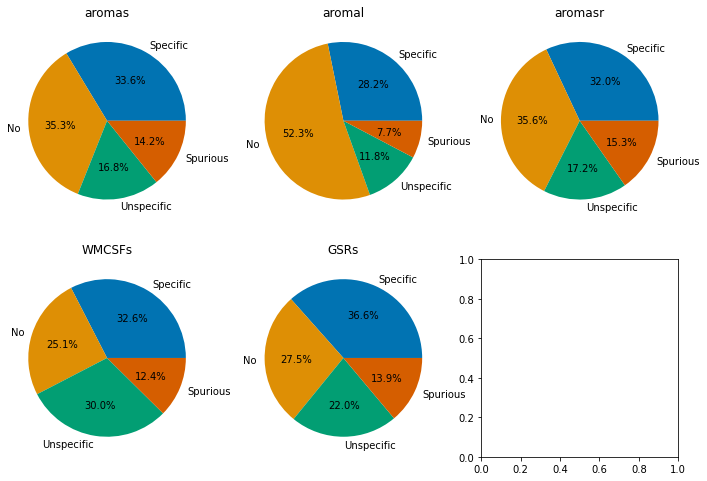

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

sns.set_palette("colorblind")

ax1 = df_exclude['aromas_S1bf_cat'].value_counts(sort=False).plot.pie(title='aromas',ax=axes[0,0], autopct="%.1f%%")
ax2 = df_exclude['aromal_S1bf_cat'].value_counts(sort=False).plot.pie(title='aromal',ax=axes[0,1],autopct="%.1f%%")    
ax3 = df_exclude['aromasr_S1bf_cat'].value_counts(sort=False).plot.pie(title='aromasr',ax=axes[0,2],autopct="%.1f%%")    
ax4 = df_exclude['WMCSFs_S1bf_cat'].value_counts(sort=False).plot.pie(title='WMCSFs',ax=axes[1,0],autopct="%.1f%%")    
ax5 = df_exclude['GSRs_S1bf_cat'].value_counts(sort=False).plot.pie(title='GSRs',ax=axes[1,1],autopct="%.1f%%")    


ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="", ylabel="")
ax4.set(xlabel="", ylabel="")
ax5.set(xlabel="", ylabel="")


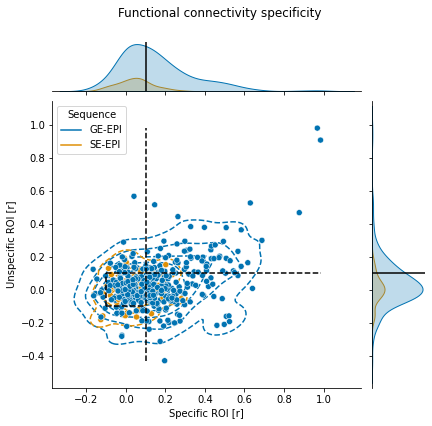

In [78]:
ax6 = sns.jointplot(data=df_exclude, x='aromas_S1bf_S1bf', y='aromas_S1bf_ACA', hue='func.sequence')
ax6.plot_joint(sns.kdeplot,linestyles='dashed', zorder=0, levels=6)

ax6.fig.suptitle('Functional connectivity specificity')
ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Specific ROI [r]', ylabel='Unspecific ROI [r]')
ax6.ax_joint.get_legend().set_title('Sequence')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['aromas_S1bf_ACA']),ymax=max(df_exclude['aromas_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['aromas_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')

/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


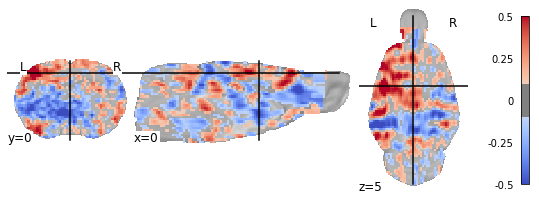

In [13]:
from nilearn import plotting
bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')

tmap_filename=seed_list[3]
plotting.plot_stat_map(tmap_filename, 
                       bg_img, 
                       threshold=0.1,
                       vmax=0.5,
                       symmetric_cbar=True,
                       cmap='coolwarm',
                       black_bg=False,
                       #display_mode="y",
                       cut_coords=(0,0.14,5))

## ---- Plotting specific FC examples

/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


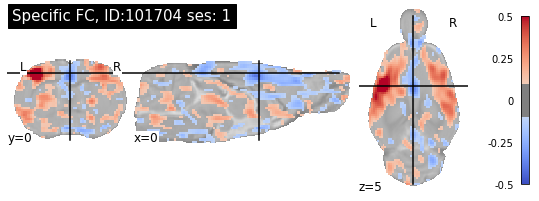

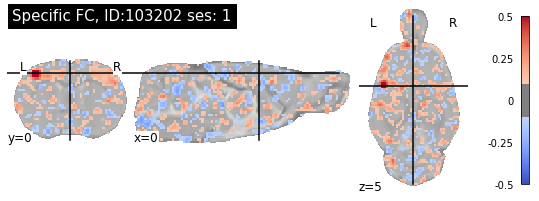

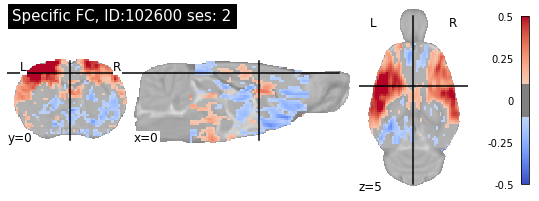

In [103]:
from nilearn import plotting
bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')

import re
df_specific = df_exclude[['rat.sub','rat.ses']][df_exclude['aromas_S1bf_cat']=='Specific'].sample(n = 3)

for i in list(range(0,df_specific.shape[0])):
    r = re.compile('/aromas/')
    seed_list_sub=list(filter(r.findall, seed_list))
    r = re.compile('S1bf')
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile(df_specific['rat.sub'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile('ses-'+df_specific['rat.ses'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))


    plotting.plot_stat_map(seed_list_sub[0], 
                           bg_img, 
                           title='Specific FC, ID:'+
                                df_specific['rat.sub'].iloc[i].astype(str)+
                                ' ses: '+
                                df_specific['rat.ses'].iloc[i].astype(str),
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5))

## ---- Plotting unspecific FC examples

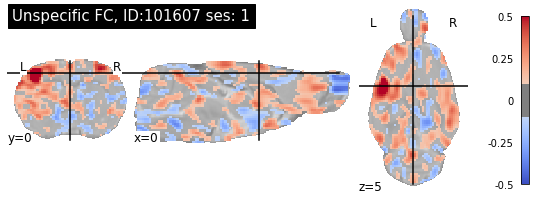

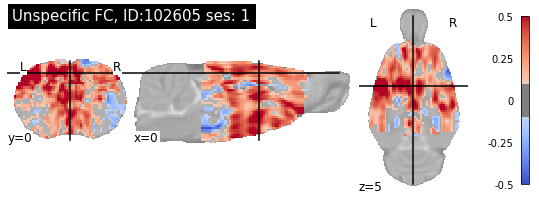

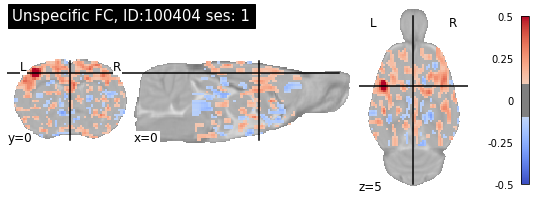

In [15]:
import re
df_specific = df_exclude[['rat.sub','rat.ses']][df_exclude['aromas_S1bf_cat']=='Unspecific'].sample(n = 3)

for i in list(range(0,df_specific.shape[0])):
    r = re.compile('/aromas/')
    seed_list_sub=list(filter(r.findall, seed_list))
    r = re.compile('S1bf')
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile(df_specific['rat.sub'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile('ses-'+df_specific['rat.ses'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))


    plotting.plot_stat_map(seed_list_sub[0], 
                           bg_img, 
                           title='Unspecific FC, ID:'+
                                df_specific['rat.sub'].iloc[i].astype(str)+
                                ' ses: '+
                                df_specific['rat.ses'].iloc[i].astype(str),
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5))

## ---- Plotting no FC examples

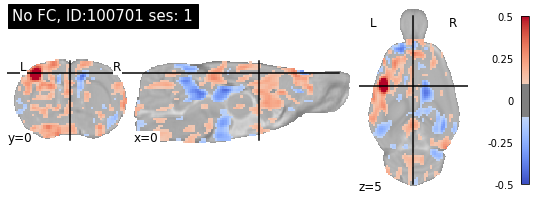

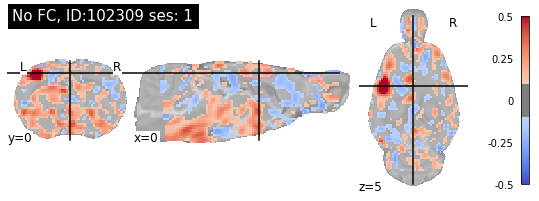

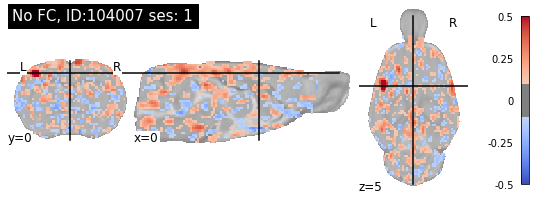

In [16]:
import re
df_specific = df_exclude[['rat.sub','rat.ses']][df_exclude['aromas_S1bf_cat']=='No'].sample(n = 3)

for i in list(range(0,df_specific.shape[0])):
    r = re.compile('/aromas/')
    seed_list_sub=list(filter(r.findall, seed_list))
    r = re.compile('S1bf')
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile(df_specific['rat.sub'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile('ses-'+df_specific['rat.ses'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))


    plotting.plot_stat_map(seed_list_sub[0], 
                           bg_img, 
                           title='No FC, ID:'+
                                df_specific['rat.sub'].iloc[i].astype(str)+
                                ' ses: '+
                                df_specific['rat.ses'].iloc[i].astype(str),
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5))

## ---- Plotting Spurious FC examples

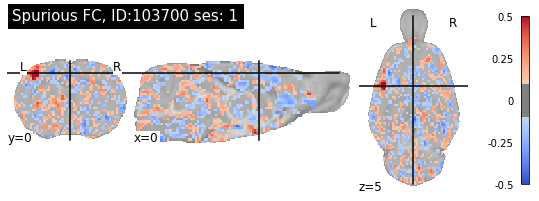

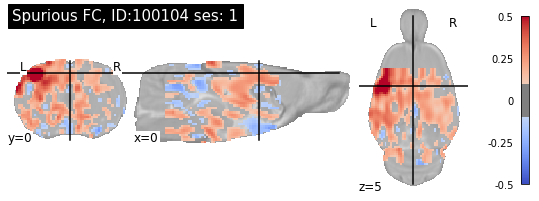

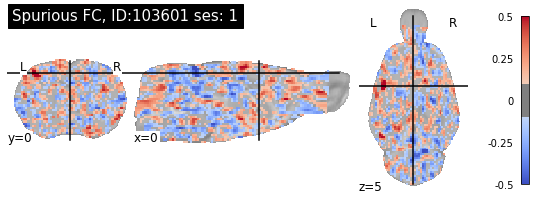

In [17]:
import re
df_specific = df_exclude[['rat.sub','rat.ses']][df_exclude['aromas_S1bf_cat']=='Spurious'].sample(n = 3)

for i in list(range(0,df_specific.shape[0])):
    r = re.compile('/aromas/')
    seed_list_sub=list(filter(r.findall, seed_list))
    r = re.compile('S1bf')
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile(df_specific['rat.sub'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile('ses-'+df_specific['rat.ses'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))


    plotting.plot_stat_map(seed_list_sub[0], 
                           bg_img, 
                           title='Spurious FC, ID:'+
                                df_specific['rat.sub'].iloc[i].astype(str)+
                                ' ses: '+
                                df_specific['rat.ses'].iloc[i].astype(str),
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5))

## Now doing a Chi2 test to see distribution of specificity among variables

In [107]:
from scipy.stats import chi2_contingency

# now testing straing
chi_stack = df_exclude.groupby(['rat.strain', 
                    'aromas_S1bf_cat']).size().unstack('aromas_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p))

# now testing sex
chi_stack = df_exclude.groupby(['rat.sex', 
                    'aromas_S1bf_cat']).size().unstack('aromas_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p))

# now testing age
chi_stack = df_exclude.groupby(['rat.age', 
                    'aromas_S1bf_cat']).size().unstack('aromas_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p))

# now testing anesthesia.maintenance
chi_stack = df_exclude.groupby(['anesthesia.maintenance', 
                    'aromas_S1bf_cat']).size().unstack('aromas_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p))

# now testing anesthesia.breathing.assistance
chi_stack = df_exclude.groupby(['anesthesia.breathing.assistance', 
                    'aromas_S1bf_cat']).size().unstack('aromas_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p))


# now testing field strength
chi_stack = df_exclude.groupby(['MRI.field.strength', 
                    'aromas_S1bf_cat']).size().unstack('aromas_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p))

# now testing sequence
chi_stack = df_exclude.groupby(['func.sequence', 
                    'aromas_S1bf_cat']).size().unstack('aromas_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p))


aromas_S1bf_cat    No  Specific  Spurious  Unspecific    sum  Specific_percent
rat.strain                                                                    
Lister Hooded     1.0       5.0       1.0         0.0    7.0              0.71
Fischer 344      18.0      26.0      10.0         4.0   58.0              0.45
Wistar           61.0      54.0      24.0        25.0  164.0              0.33
Sprague Dawley   39.0      38.0      11.0        30.0  118.0              0.32
Long Evans       30.0      19.0      14.0        12.0   75.0              0.25
Strain effect: g-value = 22.204386314337317 dof = 12 p-value = 0.03529196332006069

aromas_S1bf_cat  No  Specific  Spurious  Unspecific  sum  Specific_percent
rat.sex                                                                   
male              6         9         1           1   17              0.53
Female           44        35        14           5   98              0.36
Male             99        98        45          65  307      

In [101]:
# check how datasets are prefroming
chi_stack = df_exclude.groupby(['rat.ds', 
                    'aromas_S1bf_cat']).size().unstack('aromas_S1bf_cat')
chi_stack = chi_stack.fillna(0)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)

print("FC specificity distribution per dataset, armoas denoising")
print(chi_stack["Specific_percent"].quantile([0.25,0.5,0.75]))
chi_stack.sort_values(by="Specific_percent",ascending=False)


FC specificity distribution per dataset, armoas denoising
0.25    0.1925
0.50    0.3150
0.75    0.4400
Name: Specific_percent, dtype: float64


aromas_S1bf_cat,No,Specific,Spurious,Unspecific,sum,Specific_percent
rat.ds,,,,,,
1031,4.0,14.0,0.0,0.0,18.0,0.78
1015,0.0,7.0,0.0,2.0,9.0,0.78
1020,1.0,5.0,1.0,0.0,7.0,0.71
1022,0.0,6.0,0.0,3.0,9.0,0.67
1039,2.0,5.0,0.0,1.0,8.0,0.62
1013,2.0,3.0,0.0,0.0,5.0,0.60
1028,2.0,5.0,3.0,0.0,10.0,0.50
1024,2.0,5.0,0.0,3.0,10.0,0.50
1034,3.0,5.0,0.0,2.0,10.0,0.50


## Now looking at FC sensitivity

/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

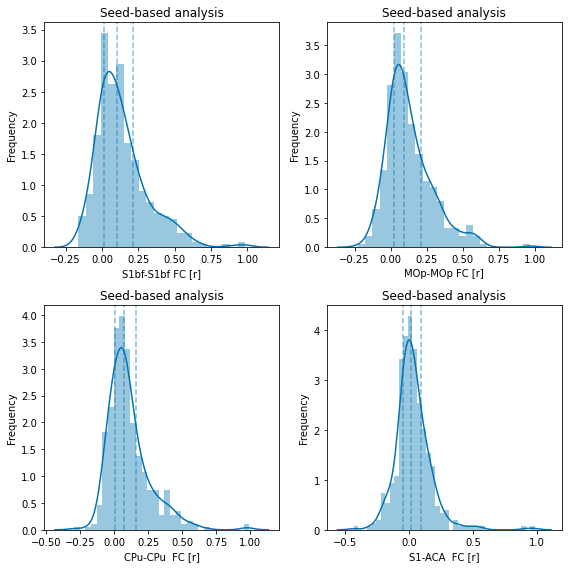

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
sns.set_palette("colorblind")

ax1 = sns.distplot(df_exclude['aromas_S1bf_S1bf'],ax=axes[0,0])
ax2 = sns.distplot(df_exclude['aromas_MOp_MOp'],ax=axes[0,1])
ax3 = sns.distplot(df_exclude['aromas_CPu_CPu'],ax=axes[1,0])
ax4 = sns.distplot(df_exclude['aromas_S1bf_ACA'],ax=axes[1,1])

ax1.set(xlabel='S1bf-S1bf FC [r]', ylabel='Frequency', title='Seed-based analysis')
ax2.set(xlabel='MOp-MOp FC [r]', ylabel='Frequency', title='Seed-based analysis')
ax3.set(xlabel='CPu-CPu  FC [r]', ylabel='Frequency', title='Seed-based analysis')
ax4.set(xlabel='S1-ACA  FC [r]', ylabel='Frequency', title='Seed-based analysis')

ax1.axvline(df_exclude['aromas_S1bf_S1bf'].quantile(0.25),ls='--',alpha=0.5)
ax1.axvline(df_exclude['aromas_S1bf_S1bf'].quantile(0.50),ls='--',alpha=0.5)
ax1.axvline(df_exclude['aromas_S1bf_S1bf'].quantile(0.75),ls='--',alpha=0.5)

ax2.axvline(df_exclude['aromas_MOp_MOp'].quantile(0.25),ls='--',alpha=0.5)
ax2.axvline(df_exclude['aromas_MOp_MOp'].quantile(0.50),ls='--',alpha=0.5)
ax2.axvline(df_exclude['aromas_MOp_MOp'].quantile(0.75),ls='--',alpha=0.5)


ax3.axvline(df_exclude['aromas_CPu_CPu'].quantile(0.25),ls='--',alpha=0.5)
ax3.axvline(df_exclude['aromas_CPu_CPu'].quantile(0.50),ls='--',alpha=0.5)
ax3.axvline(df_exclude['aromas_CPu_CPu'].quantile(0.75),ls='--',alpha=0.5)

ax4.axvline(df_exclude['aromas_S1bf_ACA'].quantile(0.25),ls='--',alpha=0.5)
ax4.axvline(df_exclude['aromas_S1bf_ACA'].quantile(0.50),ls='--',alpha=0.5)
ax4.axvline(df_exclude['aromas_S1bf_ACA'].quantile(0.75),ls='--',alpha=0.5)


plt.tight_layout()

In [5]:
#extracting quartiles for the functional connectivity parameters
df_exclude[['aromas_S1bf_S1bf','aromas_MOp_MOp','aromas_CPu_CPu','aromas_S1bf_ACA']].quantile([0.25,0.5,0.75])

,aromas_S1bf_S1bf,aromas_MOp_MOp,aromas_CPu_CPu,aromas_S1bf_ACA
0.25,0.011382,0.022202,0.001946,-0.042448
0.50,0.102565,0.092497,0.072054,0.017157
0.75,0.211400,0.210819,0.161968,0.092461


/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/joagra/.conda/envs/multirat/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Us

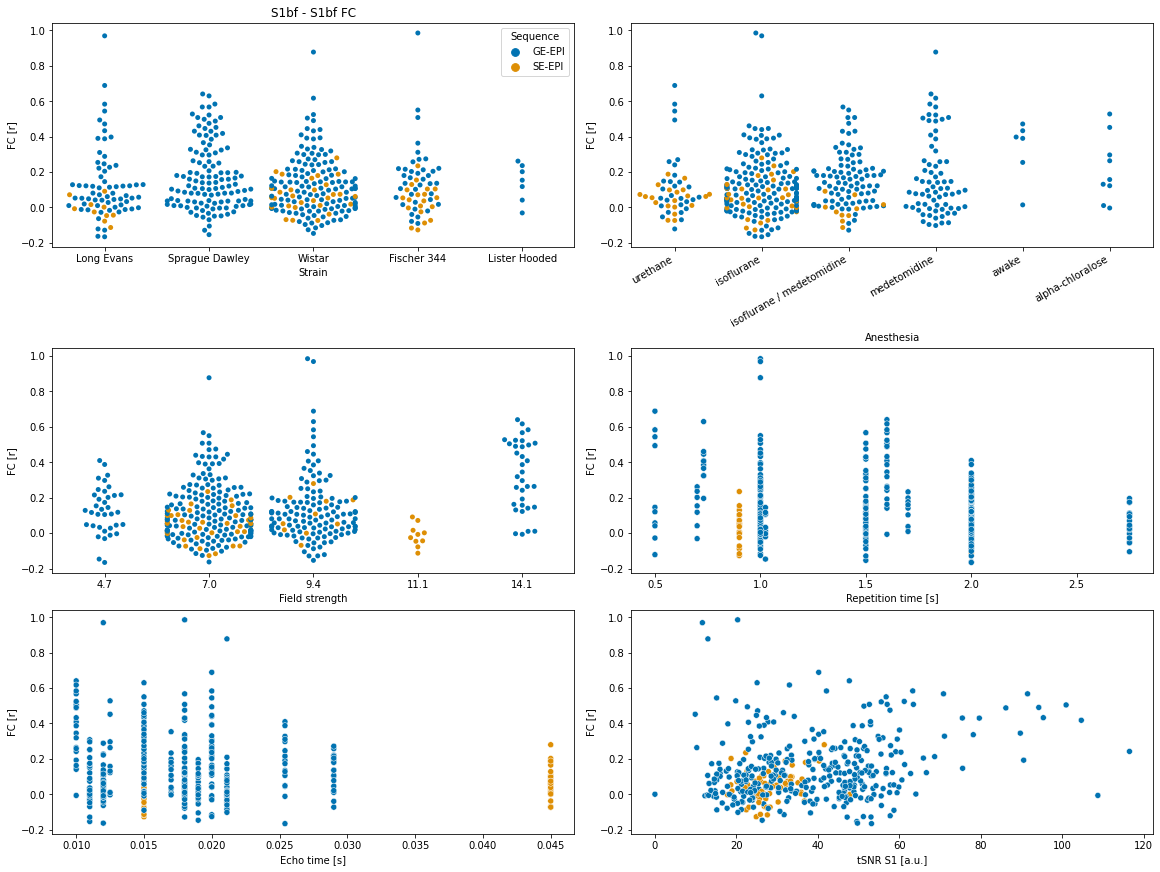

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#plotting as a function of different parameters

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(16, 12),constrained_layout=True)


sns.set_palette("colorblind")
df_exclude = df.loc[(df['exclude'] != 'yes')]

ax0 = sns.swarmplot(data=df_exclude, x="rat.strain",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[0,0])
ax1 = sns.swarmplot(data=df_exclude, x="anesthesia.maintenance",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[0,1])
ax2 = sns.swarmplot(data=df_exclude, x="MRI.field.strength",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[1,0])
ax3 = sns.scatterplot(data=df_exclude, x="func.TR",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[1,1])
ax4 = sns.scatterplot(data=df_exclude, x="func.TE",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[2,0])
ax5 = sns.scatterplot(data=df_exclude, x="tsnr.S1",
                    y="aromas_S1bf_S1bf", hue="func.sequence",ax=axes[2,1])


ax0.set(xlabel='Strain', ylabel='FC [r]', title='S1bf - S1bf FC')
ax0.get_legend().set_title('Sequence')

ax1.set(xlabel='Anesthesia', ylabel='FC [r]')
ax1.get_legend().remove()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')

ax2.set(xlabel='Field strength', ylabel='FC [r]')
ax2.get_legend().remove()

ax3.set(xlabel='Repetition time [s]', ylabel='FC [r]')
ax3.get_legend().remove()

ax4.set(xlabel='Echo time [s]', ylabel='FC [r]')
ax4.get_legend().remove()

ax5.set(xlabel='tSNR S1 [a.u.]', ylabel='FC [r]')
ax5.get_legend().remove()

#plt.constrained_layout()


In [21]:
df_sub = df_exclude[['aromas_S1bf_S1bf',
             'aromas_MOp_MOp',
             'aromas_CPu_CPu',
             'aromas_S1bf_ACA',
             'rat.sex',
             'rat.strain',
             'rat.age',
             'rat.weight',
             'exp.type',
             'anesthesia.maintenance',
            'anesthesia.breathing.rate',
            'anesthesia.heart.rate',
            'MRI.vendor',
            'MRI.field.strength',
            'func.sequence',
            'func.TR',
            'func.TE']]

df_sub['MRI.field.strength']=df_sub['MRI.field.strength'].astype('int')


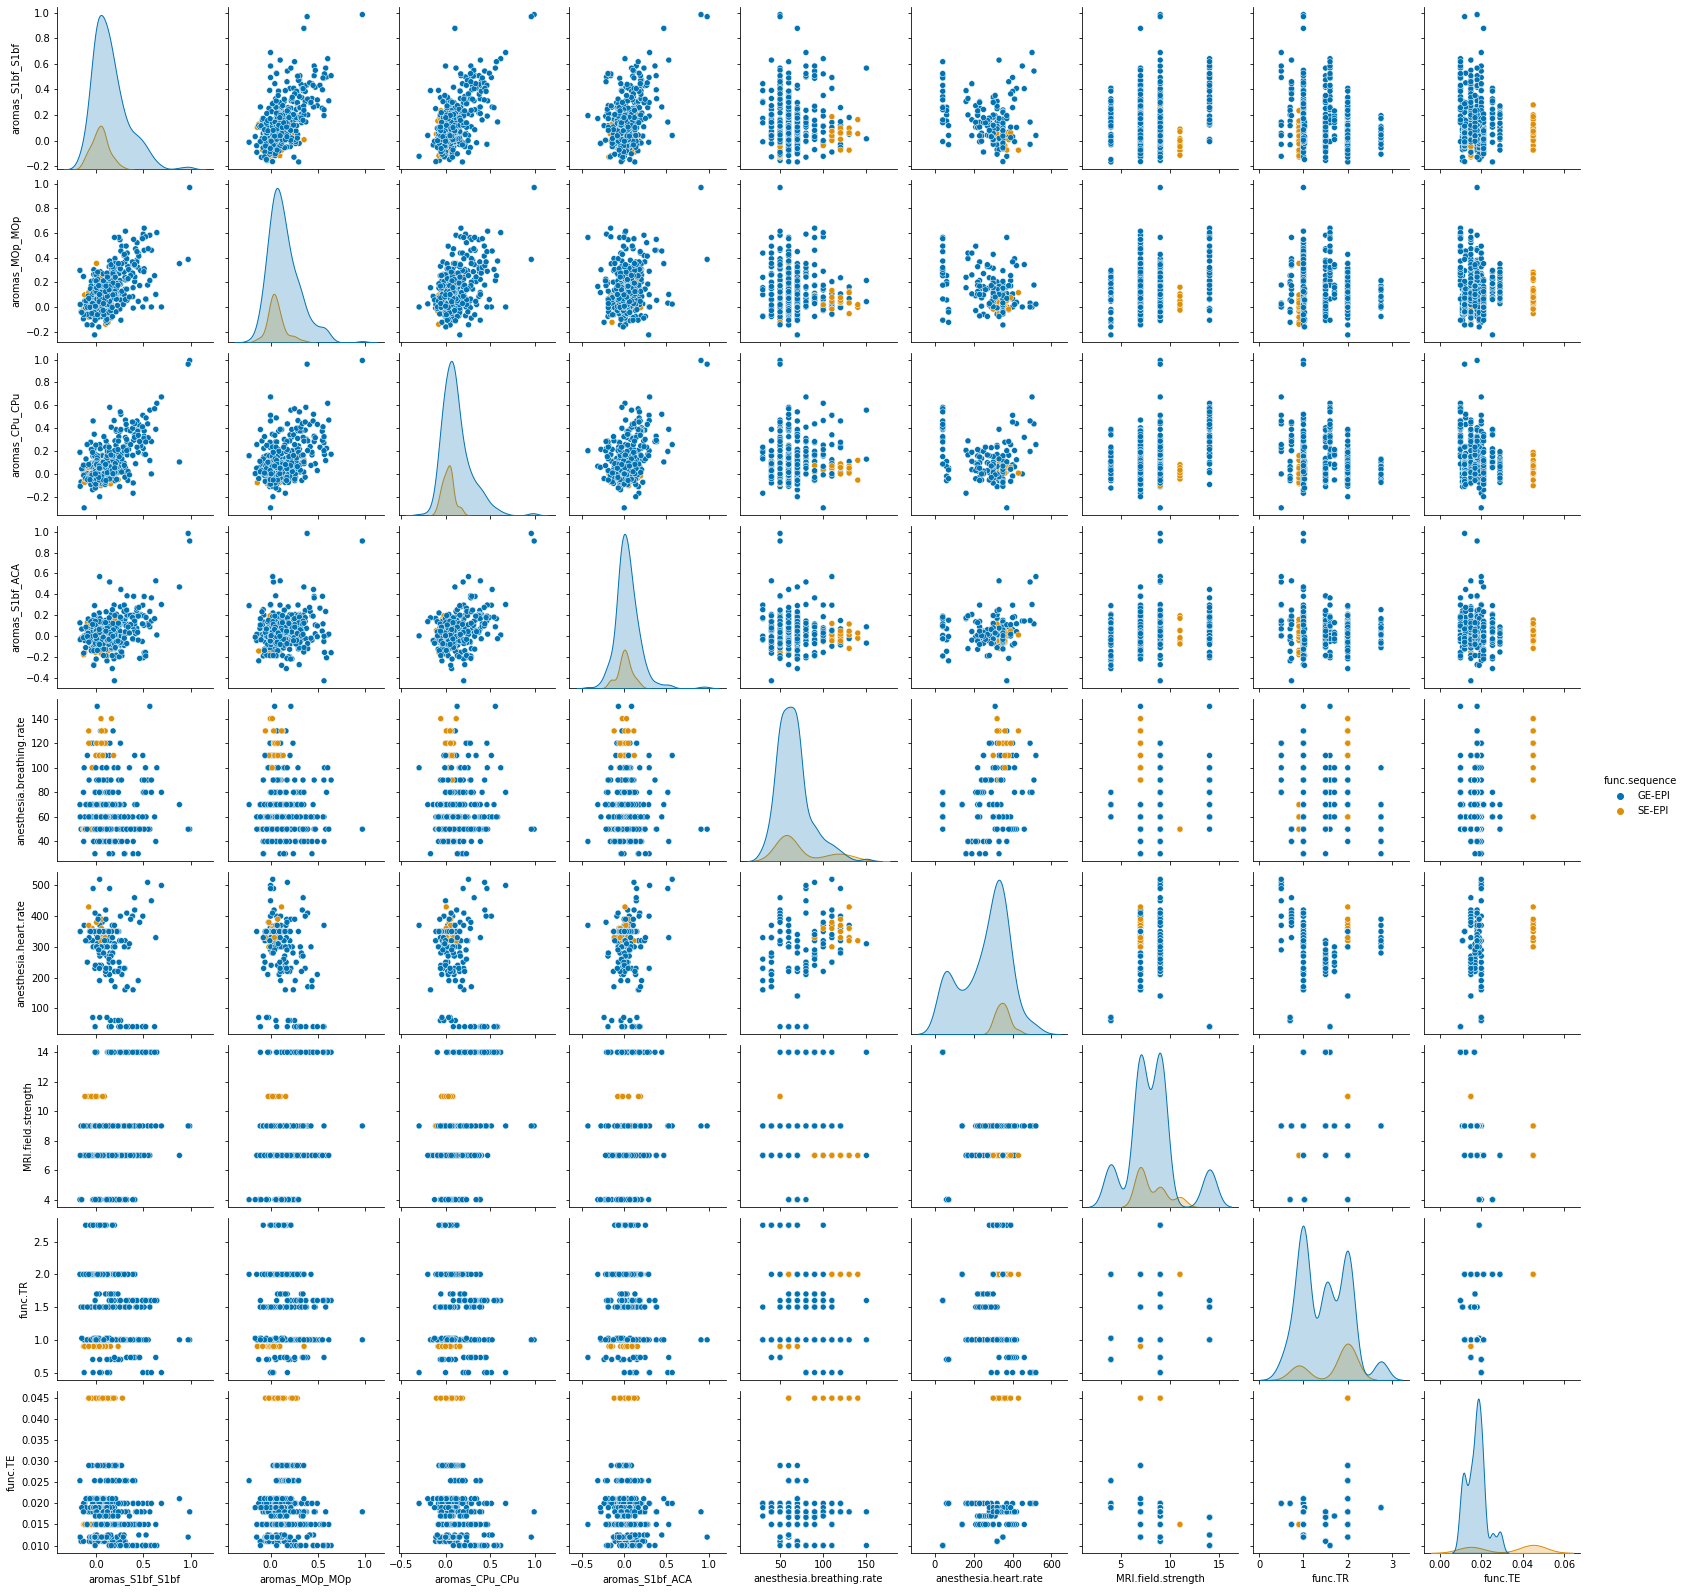

In [175]:
sns.pairplot(df_sub, hue="func.sequence")

In [9]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#because statsmodels doesn't like columns with dots. the stats were originally planned in R. :-( )
df_exclude.columns=df_exclude.columns.str.replace('[\.]', '')

# Full model
m01 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + MRIfieldstrength + funcsequence + funcTR + funcTE + tsnrS1', data=df_exclude).fit()
print(m01.summary())

print('testing for the effect of strain')
m02 = ols('aromas_S1bf_S1bf ~ anesthesiamaintenance + MRIfieldstrength + funcsequence + funcTR + funcTE + tsnrS1', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of anesthesia maintenance')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain  + MRIfieldstrength + funcsequence + funcTR + funcTE + tsnrS1', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of field strength')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + funcsequence + funcTR + funcTE + tsnrS1', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of sequence')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + MRIfieldstrength + funcTR + funcTE + tsnrS1', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of TR')
m02 = ols('aromas_S1bf_S1bf ~ MRIfieldstrength + funcsequence + funcTE + tsnrS1', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of TE')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + MRIfieldstrength + funcsequence + funcTR + tsnrS1', data=df_exclude).fit()
print(anova_lm(m02, m01))

print('')
print('testing for the effect of tSNR')
m02 = ols('aromas_S1bf_S1bf ~ ratstrain + anesthesiamaintenance + MRIfieldstrength + funcsequence + funcTR + funcTE', data=df_exclude).fit()
print(anova_lm(m02, m01))


<ipython-input-9-c80f1f1ecfdb>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_exclude.columns=df_exclude.columns.str.replace('[\.]', '')


                            OLS Regression Results                            
Dep. Variable:       aromas_S1bf_S1bf   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     8.752
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           1.29e-16
Time:                        09:35:36   Log-Likelihood:                 179.66
No. Observations:                 404   AIC:                            -329.3
Df Residuals:                     389   BIC:                            -269.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------